# Plots

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import galois
import itertools


### For small PC matrix

In [40]:
snrdb_vals = [0.1, 0.2, 0.35, 0.5, 0.9, 1.5, 2.2, 3, 3.7, 4.3, 4.9]
fl = [0.10109333333334035, 0.10088666666667416, 0.09908000000000743, 0.09604000000000677, 0.08928666666667322, 0.0784600000000042, 0.07056666666666958, 0.05982666666666724, 0.051219999999998114, 0.046546666666665015, 0.03915333333333203]
rr = [0.05097999999999882, 0.050506666666665465, 0.04701999999999893, 0.047526666666665565, 0.04320666666666572, 0.036659999999999346, 0.03204666666666622, 0.026526666666666473, 0.020719999999999947, 0.017320000000000068, 0.01510000000000014]
llr = [0.40174666666669373, 0.3980000000000276, 0.4012133333333625, 0.4013600000000266, 0.4030200000000263, 0.40396666666669223, 0.4059066666666893, 0.4072800000000209, 0.40675333333335356, 0.40596000000001803, 0.4113133333333488]
mi_diff = [0.04676666666666555, 0.047913333333332205, 0.04595999999999899, 0.04426666666666571, 0.04027999999999913, 0.03423999999999941, 0.02893333333333301, 0.02401333333333316, 0.020399999999999963, 0.016733333333333437, 0.014226666666666834]
mi = [0.046659999999998925, 0.04542666666666565, 0.04455999999999895, 0.04315333333333243, 0.039473333333332555, 0.03519999999999938, 0.030546666666666215, 0.024053333333333163, 0.019413333333333324, 0.016466666666666775, 0.015040000000000154]


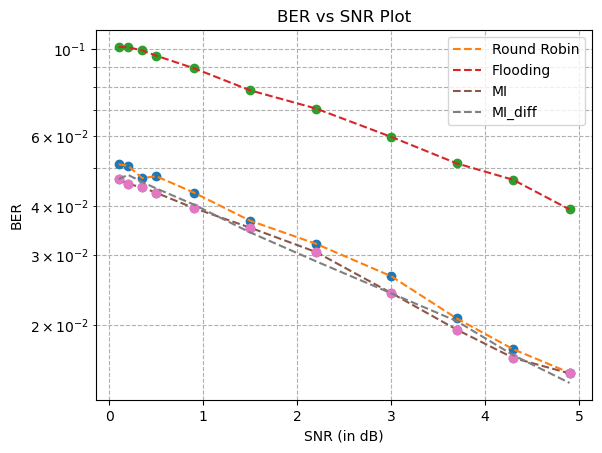

In [41]:
plt.plot(snrdb_vals, rr, 'o')  
plt.plot(snrdb_vals, rr, '--',label="Round Robin")
plt.plot(snrdb_vals, fl, 'o')  
plt.plot(snrdb_vals, fl, '--',label="Flooding")
plt.plot(snrdb_vals, mi, 'o')  
plt.plot(snrdb_vals, mi, '--',label="MI")
plt.plot(snrdb_vals, mi, 'o')  
plt.plot(snrdb_vals, mi_diff, '--',label="MI_diff")

# plt.plot(snrdb_vals, llr, 'o')  
# plt.plot(snrdb_vals, llr, '--',label="Residual LLR")


plt.title("BER vs SNR Plot")
plt.ylabel("BER")
plt.xlabel("SNR (in dB)")
plt.legend()
plt.yscale('log')
plt.grid(True, which="both", ls="--")



### For big PC matrix

In [42]:
rr_1 = [0.13773000000000205, 0.13153200000000162, 0.12997800000000162, 0.12320200000000087, 0.11190200000000021, 0.09557399999999984, 0.07756200000000014, 0.05423200000000053, 0.039576000000000215, 0.02949799999999999, 0.020297999999999938]
fl_1 = [0.15761600000000003, 0.1556239999999994, 0.151217999999999, 0.14899199999999796, 0.14189399999999672, 0.13072599999999665, 0.11583999999999613, 0.10008399999999693, 0.0870999999999977, 0.07640199999999761, 0.06567599999999885]
mi_1 = [0.11965600000000122, 0.11606200000000054, 0.11369800000000045, 0.10641400000000008, 0.09496800000000011, 0.07945200000000024, 0.057892000000000395, 0.041286000000000225, 0.02801800000000001, 0.01932199999999995, 0.012512000000000018]
res_1 = [0.3249100000000359, 0.3247600000000361, 0.32384400000003444, 0.32545600000003544, 0.3249440000000366, 0.325944000000035, 0.33004000000003547, 0.334646000000036, 0.33957400000003324, 0.34902000000003597, 0.3562520000000354]
mi_diff_1 = [0.11709600000000059, 0.1154660000000012, 0.10990600000000059, 0.10406600000000008, 0.09354800000000006, 0.07633799999999996, 0.05772400000000019, 0.03873800000000035, 0.026585999999999922, 0.018127999999999964, 0.012432000000000023]


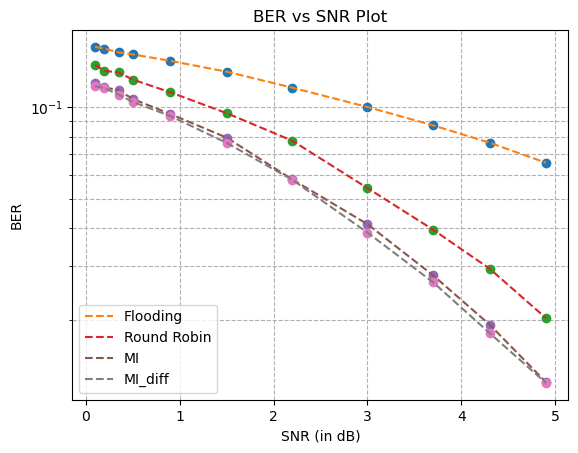

In [43]:
# plt.plot(snrdb_vals, res_1, 'o')  
# plt.plot(snrdb_vals, res_1, '--',label="Residual LLR")
plt.plot(snrdb_vals, fl_1, 'o')  
plt.plot(snrdb_vals, fl_1, '--',label="Flooding")
plt.plot(snrdb_vals, rr_1, 'o')  
plt.plot(snrdb_vals, rr_1, '--',label="Round Robin")
plt.plot(snrdb_vals, mi_1, 'o')  
plt.plot(snrdb_vals, mi_1, '--',label="MI")
plt.plot(snrdb_vals, mi_diff_1, 'o')  
plt.plot(snrdb_vals, mi_diff_1, '--',label="MI_diff")


plt.title("BER vs SNR Plot")
plt.ylabel("BER")
plt.xlabel("SNR (in dB)")
plt.legend()
plt.yscale('log')
plt.grid(True, which="both", ls="--")


In [28]:
B = np.loadtxt("./base_matrices/NR_2_5_22.txt")
print(B.shape)
rows = B.shape[0]*22
cols = B.shape[1]*22
print("k = ",cols-rows)
print("n = ",cols)

(42, 52)
k =  220
n =  1144


In [29]:
G = np.load("gen_matrices/k224_n1148_bg2_G.npy")
print(G.shape)

(224, 1204)


In [2]:
class Decoder:
    
    def __init__ (self,H, num_iter,cluster_size):
        # code parameters
        self.n = H.shape[1]
        self.k = self.n - H.shape[0]
        self.H = H
        self.num_iter = num_iter
        
        # misc parameters (epsilon : for numerical stability)
        self.ep = 1e-5
        
        # graph parameters
        self.num_VN = self.n
        self.num_CN = self.n-self.k
        self.cluster_size = cluster_size
        
        # adjacency list for VN and CN
        self.CN = []
        self.VN = []
        self.construct_graph(H)
        self.initialize_clusters(self.cluster_size)
        self.iteration_number = 0
        self.policy = None # policy for choosing clusters (using RL)
        
    # build the adjacency list for Tanner Graph
    def construct_graph(self,H):
        for i in range(self.num_CN):
            temp = []
            for j in range(self.num_VN):
                if H[i,j]==1:
                    temp.append(j)
            self.CN.append(temp)
            
        for i in range(self.num_VN):
            temp = []
            for j in range(self.num_CN):
                if H[j,i]==1:
                    temp.append(j)
            self.VN.append(temp)
    
    # print the tanner graph
    def print_graph(self,mode):
        if mode=="matrix":
            print(self.H)
        elif mode=="list":
            print('CN : ',self.CN)
            print('VN : ',self.VN)
        else:
            print('Invalid mode')
    
    
    # initialize clusters of CNs
    def initialize_clusters(self,cluster_size):
        self.num_clusters = math.ceil(self.num_CN/cluster_size)
        self.MI = np.zeros(self.num_clusters) # for storing current MI of clusters

        self.clusters = []
        for i in np.arange(0,self.num_CN,cluster_size):
            temp = []
            for j in range(i,min(i+cluster_size,self.num_CN)):
                temp.append(j)
            self.clusters.append(temp)  
            

                    
    # returns the absolute min, 2nd min and parity of the input array
    def get_min(self,arr):
        arr = np.array(arr)
        arr = arr[~np.isnan(arr)]
        parity = np.prod(np.sign(arr))
        if len(arr) < 2:
            print("arr = ",arr)
            raise ValueError("Not enough valid elements in the array.")
        arr = np.sort(np.abs(arr))
        return arr[0],arr[1],parity
    
    # perform row update of cluster a 
    def row_update(self,a):
        # subtract step (removing known beliefs)
        for j in range(self.num_VN):
            tot = 0
            for i in self.clusters[a]:
                if not np.isnan(self.L[i,j]):
                    tot = tot + self.L[i,j]
            self.sum[j] = self.sum[j] - tot

        # flow down the sum into the cluster a
        for j in range(self.num_VN):
            for i in self.clusters[a]:
                if not np.isnan(self.L[i,j]):
                    self.L[i,j] = self.sum[j]

        # perform minsum for each row
        for i in self.clusters[a]:
            m1,m2,p = self.get_min(self.L[i])
            for j in range(self.num_VN):
                if not np.isnan(self.L[i,j]):
                    self.L[i,j] = p*np.sign(self.L[i,j])*m2 if np.abs(self.L[i,j])==m1 else p*np.sign(self.L[i,j])*m1

    def col_update(self,a):
        for j in range(self.num_VN):
            tot = 0
            for i in self.clusters[a]:
                if not np.isnan(self.L[i,j]):
                    tot = tot + self.L[i,j]
            self.sum[j] = self.sum[j] + tot
            
    def pseudo_row_update(self,a):
        # subtract step (removing known beliefs)
        p_L = self.L
        p_sum = self.sum
        
        for j in range(self.num_VN):
            tot = 0
            for i in self.clusters[a]:
                if not np.isnan(p_L[i,j]):
                    tot = tot + p_L[i,j]
            p_sum[j] = p_sum[j] - tot

        # flow down the sum into the cluster a
        for j in range(self.num_VN):
            for i in self.clusters[a]:
                if not np.isnan(p_L[i,j]):
                    p_L[i,j] = p_sum[j]

        # perform minsum for each row
        for i in self.clusters[a]:
            m1,m2,p = self.get_min(p_L[i])
            for j in range(self.num_VN):
                if not np.isnan(p_L[i,j]):
                    p_L[i,j] = p*np.sign(p_L[i,j])*m2 if np.abs(p_L[i,j])==m1 else p*np.sign(p_L[i,j])*m1
        
        return p_L, p_sum

    def pseudo_col_update(self, a, p_L, p_sum):
        for j in range(self.num_VN):
            tot = 0
            for i in self.clusters[a]:
                if not np.isnan(p_L[i,j]):
                    tot = tot + p_L[i,j]
            p_sum[j] = p_sum[j] + tot
        
        return p_L


    def decode(self,y,verbose="off",scheduling="round-robin"):
        # sum is initialized by incoming beliefs (initial LLRs)
        self.sum = y
        
        # initializing the storage matrix
        self.L = np.full(self.H.shape, np.nan, dtype=float)  # Initialize with NaNs
        for i in range(self.num_CN):
            for j in range(self.num_VN):
                self.L[i,j] = 0 if self.H[i,j]==1 else np.nan
        
#         # initial MI approximation
#         self.MI = self.get_MI(self.L)
        self.MI_list = []
        for k in range(self.num_iter):
            self.MI = self.get_MI(self.L)
            print("Mutual Info : ",self.MI)
            self.MI_list.append(self.MI)
            y_hat = np.array([1 if val<0 else 0 for val in self.sum])
            error = np.sum((c+y_hat)%2)/len(y_hat)
            error_list.append(error)
            self.iteration_number = k
            a = self.get_next_cluster(k,scheduling)
            if verbose=="on":
                print("Iteration : ",k,"\tCluster scheduled : ",a)
            self.row_update(a)
            self.col_update(a)
            c_hat = np.array([1 if val<0 else 0 for val in self.sum])
            if self.stopping_criteria(k,c_hat):
                print("Mutual Info : ",self.get_MI(self.L))
                self.MI_list.append(self.get_MI(self.L))
                y_hat = np.array([1 if val<0 else 0 for val in self.sum])
                error = np.sum((c+y_hat)%2)/len(y_hat)
                error_list.append(error)

                break
        return c_hat
    
    def get_MI(self,L):
        var = np.zeros(self.num_clusters)
        for a in range(self.num_clusters):
            total = 0
            count = 0
            for i in self.clusters[a]:
                for j in self.CN[i]:
                    total = total + np.abs(L[i,j])
                    count = count + 1
            mean = total/count
            var[a] = mean*2
        
        MI = np.zeros(self.num_clusters)
        for a in range(self.num_clusters):
            MI[a] = self.J(var[a])
        
        return MI

        
    def J(self,sigma):
        # constants
        a_J1 = -0.0421061
        b_J1 = 0.209252
        c_J1 = -0.00640081

        a_J2 = 0.00181491
        b_J2 = -0.142675
        c_J2 = -0.0822054
        d_J2 = 0.0549608

        # threshold sigma*
        sigma_star = 1.6363
        
        if 0 <= sigma <= sigma_star:
            return a_J1 * sigma**3 + b_J1 * sigma**2 + c_J1 * sigma
        elif sigma_star < sigma < 10:
            exponent = a_J2 * sigma**3 + b_J2 * sigma**2 + c_J2 * sigma + d_J2
            return 1 - math.exp(exponent)
        else:  # sigma >= 10
            return 1

            
        
    def stopping_criteria(self,k,c_hat):
        c1 = k>self.num_iter
        c2 = (np.sum(np.dot(self.H,c_hat.T)%2)==0)
        return c1 or c2
    
    # calculates the difference between information metrics for cluster a
    def calculate_residual(self, info, info_new, a):
        return info_new[a] - info[a]
    
    def get_next_cluster(self,iter_number,scheduling):
        # round robin
        if scheduling=="round-robin":
            return (iter_number%self.num_clusters)
        
        elif scheduling=="residual-llr":
            llr_gains = np.zeros(self.num_clusters)
            for a in range(self.num_clusters):
                p_L, p_sum = self.pseudo_row_update(a)
                max_diff = -100000
                for j in self.CN[a]:
                    max_diff = max(np.abs(self.L[a,j]-p_L[a,j]),max_diff)
                llr_gains[a] = max_diff
            return np.argmax(llr_gains)
                
    
        # Information Gain
        MI_gains = np.zeros(self.num_clusters)
        for a in range(self.num_clusters):
            p_L, p_sum = self.pseudo_row_update(a)
            p_L = self.pseudo_col_update(a,p_L,p_sum)
            MI_new = self.get_MI(p_L)
            gain = self.calculate_residual(self.MI, MI_new, a)
            MI_gains[a] = gain
            
        a = np.argmax(MI_gains)
        return a
        

In [3]:
def circular_shift_identity(z, k):
    """
    Generate a z x z identity matrix with circularly shifted rows by k positions.
    If k == -1, return a z x z zero matrix.
    """
    if k == -1:
        return np.zeros((z, z), dtype=int)
    else:
        return np.roll(np.eye(z, dtype=int), -k, axis=1)

def expand_base_matrix(B, z):
    """
    Expand the base matrix B into the full parity check matrix with expansion factor z.

    B: Base matrix of size m x n
    z: Expansion factor

    Returns the expanded parity-check matrix of size (m*z) x (n*z).
    """
    m, n = B.shape
    H = np.zeros((m * z, n * z), dtype=int)  # Full parity check matrix initialized to zeros

    for i in range(m):
        for j in range(n):
            # Expand each base matrix element into a z x z block
            block = circular_shift_identity(z, B[i, j])
            H[i * z:(i + 1) * z, j * z:(j + 1) * z] = block

    return H



In [4]:
def get_codewords(H):
    GF = galois.GF(2)
    A = GF(H)
    N = A.null_space()
    vec = [np.array(v) for v in itertools.product([0, 1], repeat=N.shape[0])]
    C = np.array(GF(vec) @ N)
    return C

# # B = np.loadtxt('./base_matrices/NR_1_6_13.txt', dtype=int)
# # print("Shape of B : ",B.shape)

# # H = expand_base_matrix(B=B,z=13)
# # print("Shape of H : ",H.shape)
# H = np.array( [[0,0,1,1,0,0,1,0,0,0,0,0,0,0,0]
# ,[1,0,0,0,1,0,0,1,0,0,0,0,0,0,0]
# ,[0,1,0,0,0,1,0,0,1,0,0,0,0,0,0]
# ,[1,0,0,0,0,1,1,0,0,0,0,0,0,0,0]
# ,[0,1,0,1,0,0,0,1,0,0,0,0,0,0,0]
# ,[0,0,1,0,1,0,0,0,1,0,0,0,0,0,0]
# ,[1,0,0,1,0,0,0,0,1,0,0,0,0,0,0]
# ,[0,1,0,0,1,0,1,0,0,0,0,0,0,0,0]
# ,[0,0,1,0,0,1,0,1,0,0,0,0,0,0,0]
# ,[1,0,0,1,0,0,1,0,0,1,0,0,1,0,0]
# ,[0,1,0,0,1,0,0,1,0,0,1,0,0,1,0]
# ,[0,0,1,0,0,1,0,0,1,0,0,1,0,0,1]],dtype=int)

# n = H.shape[1]
# C = get_codewords(H)
# C = np.array(C)
# dmin = np.min(np.sum(C[1:],axis=1))


B = np.array([[0,2,-1,3,-1,-1,2,4,1,0],
            [3,1,-1,-1,0,0,1,2,3,0],
            [1,0,0,-1,1,4,2,1,0,-1],
            [-1,0,0,2,3,-1,-1,-1,0,-1],
            [1,0,2,0,1,0,-1,-1,-1,-1],
            [2,1,0,0,2,-1,-1,-1,1,-1]]
            ,dtype=int)

# B = np.array([[-1,0,1],
#              [1,0,2]],dtype=int)
print("B = \n",B)
z = 5

H = expand_base_matrix(B,z)
np.savetxt('output.txt',H,fmt="%d")
print("H : \n",H)

C = get_codewords(H)
print("Codewords : \n",C)
print(len(C)," codewords found")
dmin = np.min(np.sum(C[1:],axis=1))
print("dmin = ",dmin)



B = 
 [[ 0  2 -1  3 -1 -1  2  4  1  0]
 [ 3  1 -1 -1  0  0  1  2  3  0]
 [ 1  0  0 -1  1  4  2  1  0 -1]
 [-1  0  0  2  3 -1 -1 -1  0 -1]
 [ 1  0  2  0  1  0 -1 -1 -1 -1]
 [ 2  1  0  0  2 -1 -1 -1  1 -1]]
H : 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
Codewords : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
1048576  codewords found
dmin =  9


In [9]:

error_list = []

dec = Decoder(H=H,num_iter=100,cluster_size=6)

snrdb_value = 1
snr = math.pow(10,snrdb_value/20)
c = C[np.random.choice(len(C))] # correct codeword
print(f"codeword sent : {c}")
sigma = 1/math.sqrt(snr)
y = np.power(- 1,c) + np.random.normal(loc=0, scale=sigma, size=c.shape) # noisy codeword
print(f"vector received : {y}")

c_sent = np.array([1 if val<0 else 0 for val in y])
print("Error vector : ",(c+c_sent)%2)

codeword sent : [0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 1 1 1 1 0 0 1 1 0]
vector received : [ 0.9304992  -0.83839289 -0.32596412  0.10970904 -0.85763661 -0.05231418
  0.87355752  0.0978279  -0.54856043  0.69592295  2.91741196  0.27581375
 -0.1497744  -0.28975138 -1.55012614  0.56746424 -0.56544582 -1.21939326
 -1.32814074 -1.37546637  2.16101814 -1.12151827  2.28603254  2.3803468
 -2.19666257  1.29541161  0.12557483  1.45365959 -0.12751376  1.74562675
  1.720731   -2.15627188 -0.96333417 -0.42194118  0.37957558  0.48899181
  2.13918698  0.62434875  1.71030236  2.16365453  0.89394782 -0.37272488
 -1.12822302 -0.02517499  0.1457319   0.55823135  1.24922151 -0.22463668
 -1.19531315  2.49665391]
Error vector :  [0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [10]:
c_hat = dec.decode(y,verbose="on",scheduling="mi")
print("Decoded codeword : \n",c_hat)

Mutual Info :  [0. 0. 0. 0. 0.]
Iteration :  0 	Cluster scheduled :  4
Mutual Info :  [0.03003557 0.02488241 0.01084467 0.05841041 0.0887049 ]
Iteration :  1 	Cluster scheduled :  2
Mutual Info :  [0.04060334 0.04729688 0.39738606 0.18390495 0.262215  ]
Iteration :  2 	Cluster scheduled :  3
Mutual Info :  [0.03547146 0.09685119 0.18489871 0.179909   0.44293397]
Iteration :  3 	Cluster scheduled :  2
Mutual Info :  [0.08963807 0.17789503 0.17897905 0.40973331 0.10683125]
Iteration :  4 	Cluster scheduled :  2
Mutual Info :  [0.07071992 0.03384074 0.10404905 0.07174517 0.07063443]
Iteration :  5 	Cluster scheduled :  1
Mutual Info :  [0.01655521 0.01630972 0.02674926 0.01029221 0.05761023]
Iteration :  6 	Cluster scheduled :  3
Mutual Info :  [0.02510345 0.01078648 0.08497881 0.201178   0.03365954]
Iteration :  7 	Cluster scheduled :  0
Mutual Info :  [0.03442756 0.01046075 0.06429594 0.06318756 0.07589429]
Iteration :  8 	Cluster scheduled :  4
Mutual Info :  [0.03442756 0.04875087 0.1

In [11]:
print("error vector = ",(c_hat+c)%2)

error vector =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


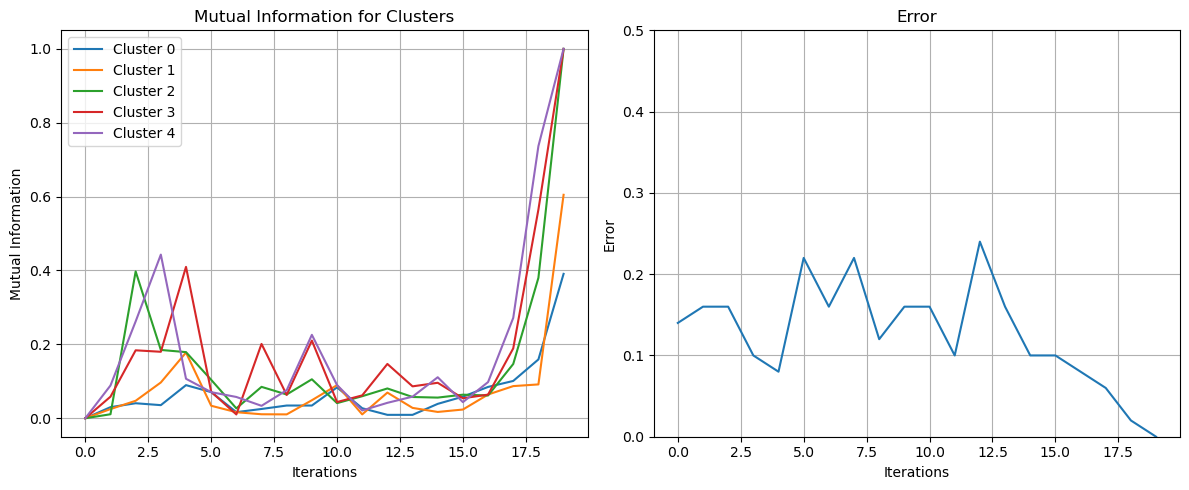

In [12]:
# Assuming MI_list and error_list are already defined
MI_list = np.array(dec.MI_list)

# Create a figure and two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# First Plot (Mutual Information List)
for a in range(dec.num_clusters):
    ax[0].plot(MI_list[:, a], label=f"Cluster {a}")
ax[0].grid()
ax[0].legend()
ax[0].set_title("Mutual Information for Clusters")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Mutual Information")

# Second Plot (Error List)
ax[1].plot(error_list)
ax[1].grid()
ax[1].set_ylim(0, 0.5)
ax[1].set_title("Error")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Error")

# Display the plots
plt.tight_layout()
plt.show()
